Czas klasycznego DFT: 0.4185 s
Czas FFT: 0.000441 s
Przyspieszenie (DFT/FFT): 948.7x


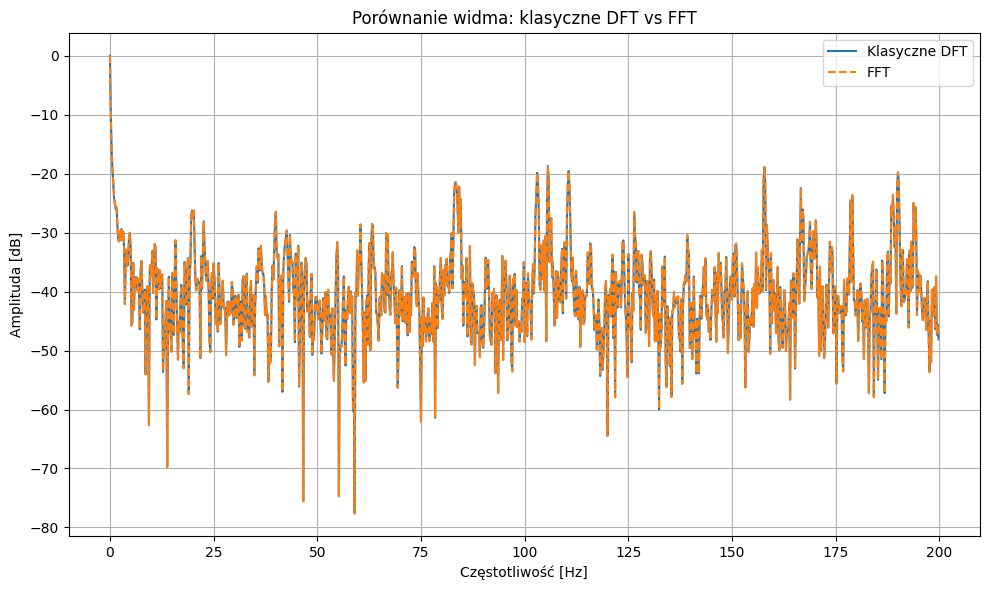

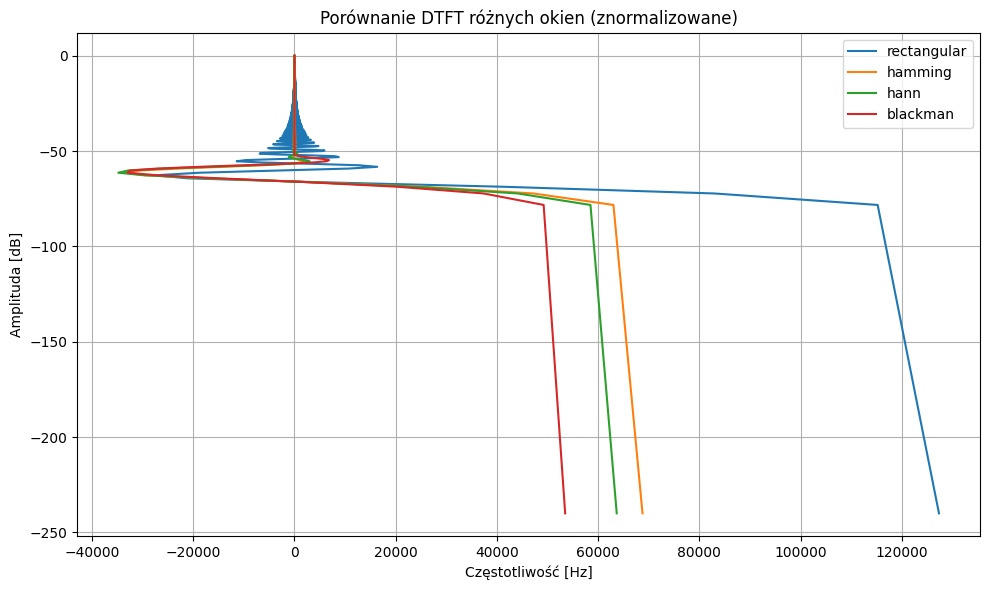

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import time

#Parameters
N = 2000
fs = 400
f1, f2, f3 = 300, 300.25, 299.75
A = 2
k = np.arange(N)
x = A * (np.sin(2 * np.pi * f1 * k * fs) +
         np.sin(2 * np.pi * f2 * k * fs) +
         np.sin(2 * np.pi * f3 * k * fs))
ss

start_dft = time.time()

#create matrix DFT
n = np.arange(N)
m = n.reshape((N, 1))
W = np.exp(-2j * np.pi * m * n / N)

X_dft = np.dot(W, x)
X_dft_mag = np.abs(X_dft) / np.max(np.abs(X_dft))

end_dft = time.time()
time_dft = end_dft - start_dft

# -------------------------------
# FFT
# -------------------------------

start_fft = time.time()

X_fft = np.fft.fft(x)
X_fft_mag = np.abs(X_fft) / np.max(np.abs(X_fft))

end_fft = time.time()
time_fft = end_fft - start_fft


#Comprasion times


print(f"Czas klasycznego DFT: {time_dft:.4f} s")
print(f"Czas FFT: {time_fft:.6f} s")
print(f"Przyspieszenie (DFT/FFT): {time_dft/time_fft:.1f}x")


freqs = np.fft.fftfreq(N, d=1/fs)

plt.figure(figsize=(10,6))
plt.plot(freqs[:N//2], 20 * np.log10(np.maximum(X_dft_mag[:N//2], 1e-12)), label='Klasyczne DFT')
plt.plot(freqs[:N//2], 20 * np.log10(np.maximum(X_fft_mag[:N//2], 1e-12)), label='FFT', linestyle='dashed')
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Amplituda [dB]")
plt.title("Porównanie widma: klasyczne DFT vs FFT")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

for name, w in windows.items():
    w_dtft, omega = freqz(w, worN=8192)
    w_dtft_norm = np.abs(w_dtft) / np.max(np.abs(w_dtft))  #normalization
    
    plt.plot(omega / (2 * np.pi) * fs, 20 * np.log10(np.maximum(w_dtft_norm, 1e-12)), label=name)

plt.title('Porównanie DTFT różnych okien (znormalizowane)')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda [dB]')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

